In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 18s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [4]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

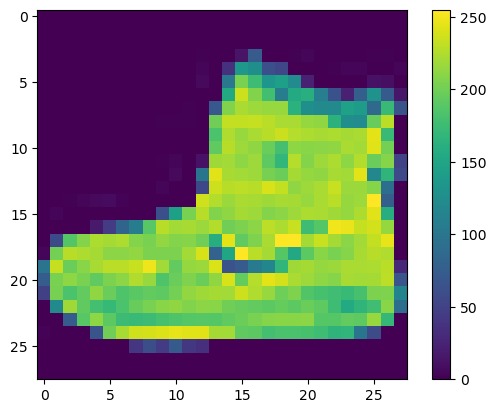

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

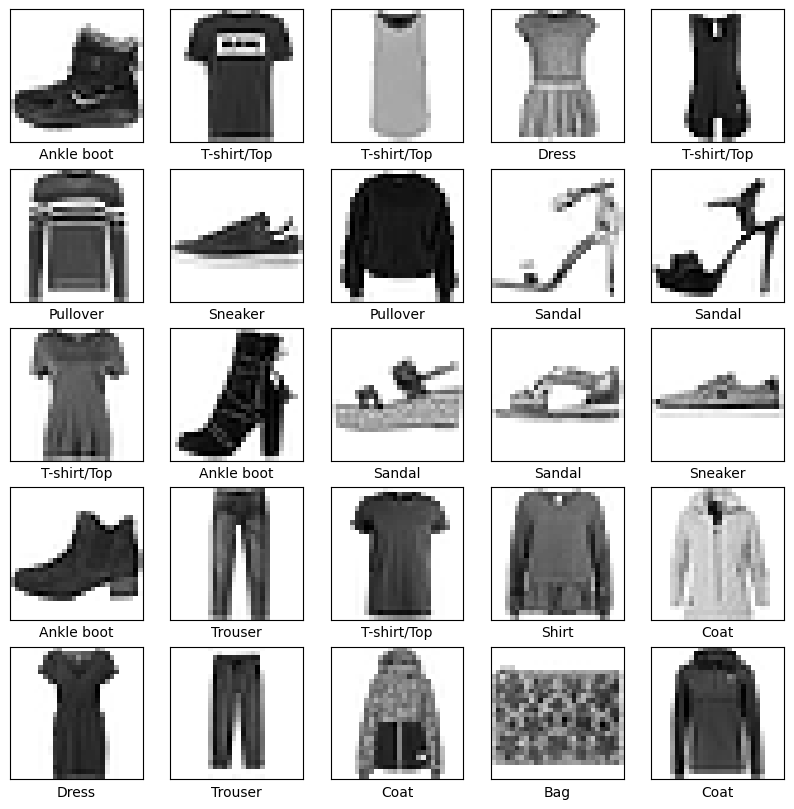

In [13]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [20]:
history = model.fit(train_images.astype(np.float32), 
                    train_labels.astype(np.float32), 
                    epochs = 30, 
                    validation_split = 0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8615 - loss: 0.4096 - val_accuracy: 0.8753 - val_loss: 0.3480
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8813 - loss: 0.3254 - val_accuracy: 0.8758 - val_loss: 0.3482
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8879 - loss: 0.3045 - val_accuracy: 0.8769 - val_loss: 0.3356
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8972 - loss: 0.2865 - val_accuracy: 0.8831 - val_loss: 0.3238
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9006 - loss: 0.2673 - val_accuracy: 0.8863 - val_loss: 0.3182
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9046 - loss: 0.2572 - val_accuracy: 0.8888 - val_loss: 0.3094
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9081 - loss: 0.2470 - val_accuracy: 0.8838 - val_loss: 0.3275
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9112 - loss: 0.2390 - 

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n Test Accuracy : ', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.8979 - loss: 0.3430

 Test Accuracy :  0.8978999853134155


In [22]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
predictions[0]

array([1.5162147e-16, 4.1425269e-15, 9.3309549e-14, 3.0561000e-18,
       5.0416592e-17, 5.5770633e-10, 7.4869573e-18, 5.5873244e-07,
       9.3695234e-12, 9.9999940e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

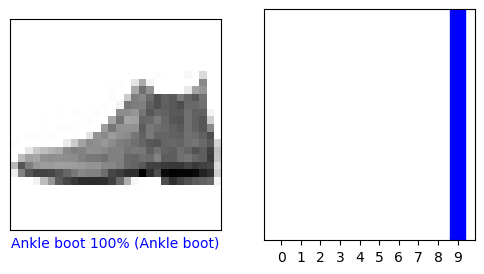

In [32]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

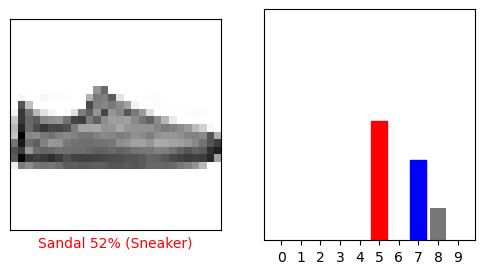

In [33]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

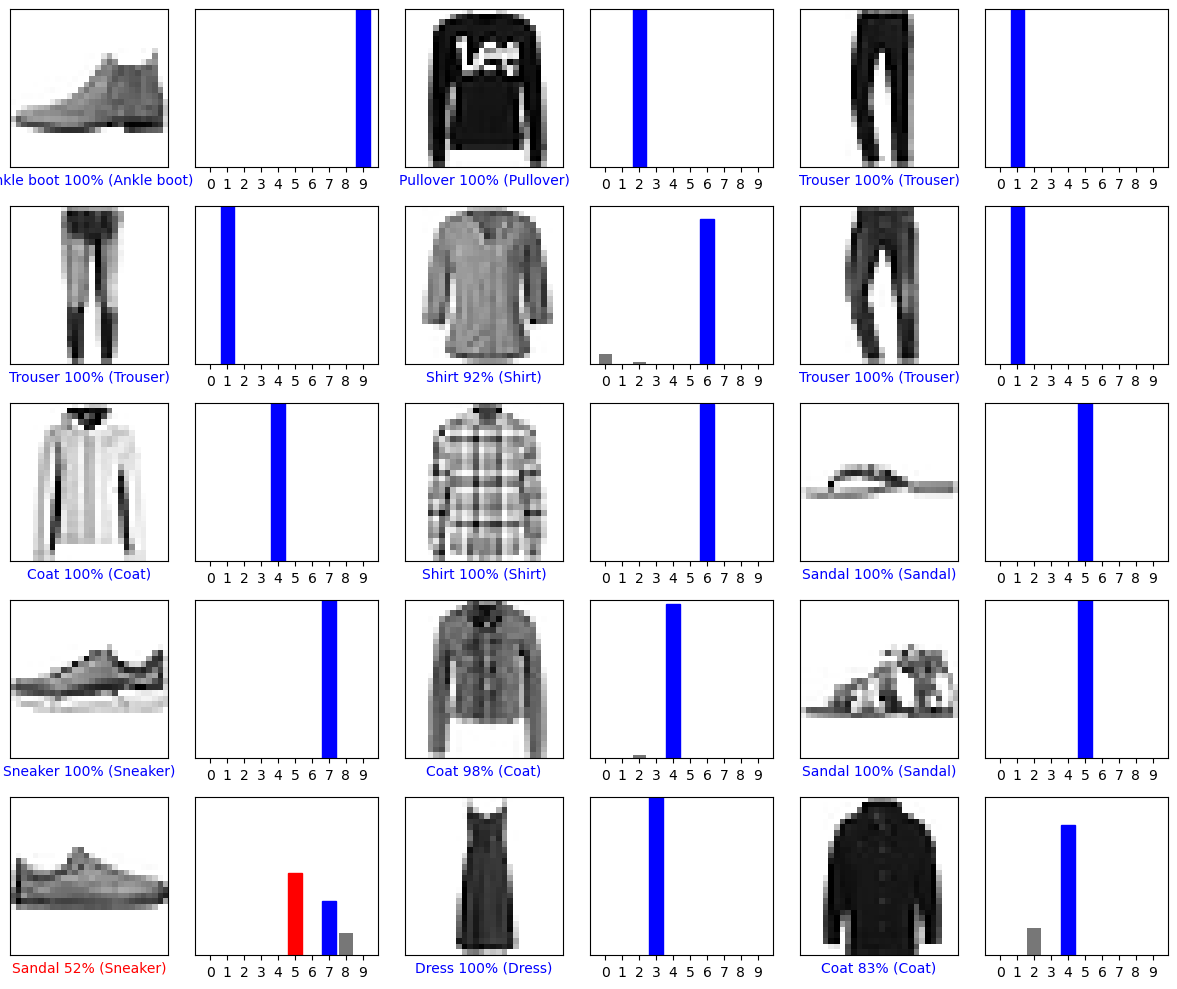

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [36]:
img = test_images[1]
print(img.shape)

(28, 28)


In [37]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[4.4291623e-06 6.0001324e-15 9.9983895e-01 4.4870897e-23 1.5611536e-04
  5.1525183e-11 4.7157073e-07 5.9147303e-15 1.8574443e-14 6.2259727e-17]]


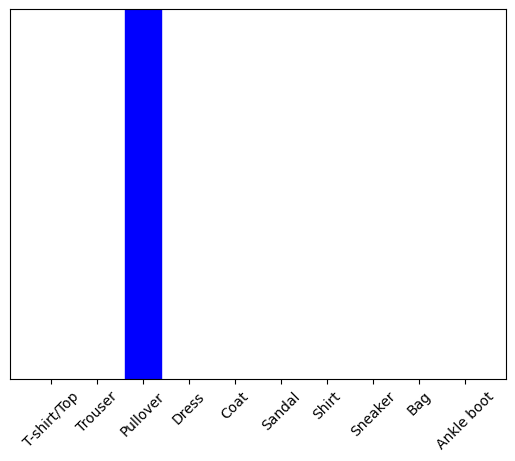

In [40]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [42]:
np.argmax(predictions_single[0])

2